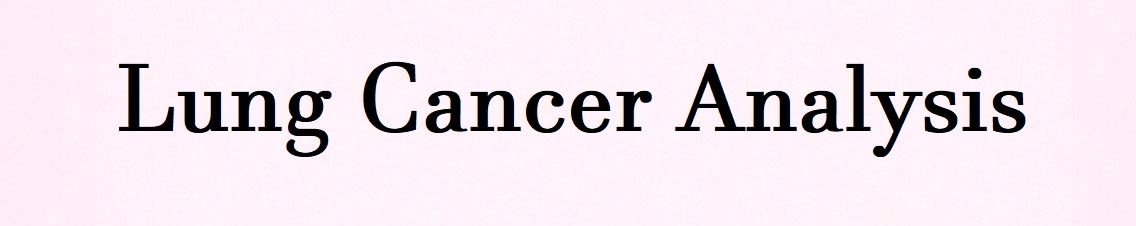

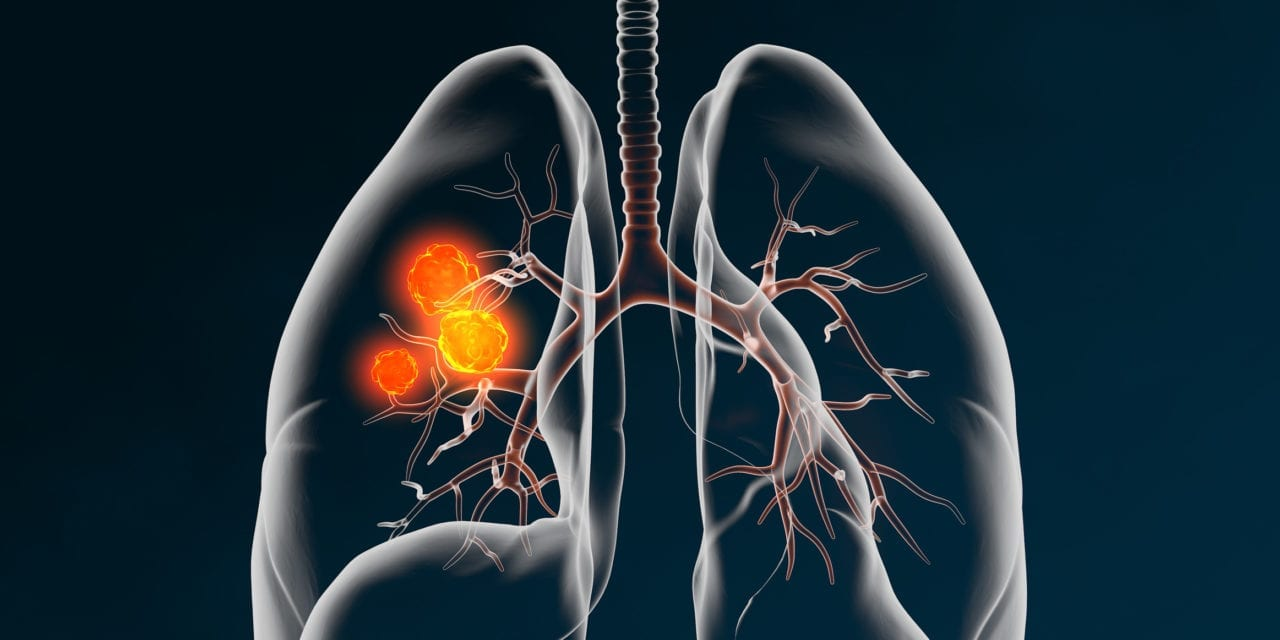

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#For ignoring warning
import warnings
warnings.filterwarnings("ignore")

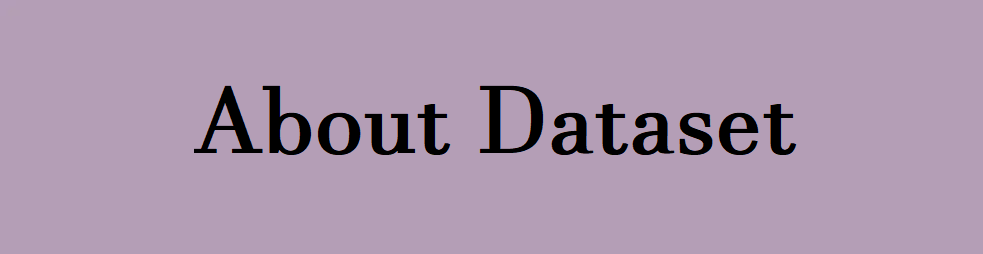

* **GENDER :** M [Male] , F [Female]
* **AGE :** Age of patients
* **SMOKING :** 2 [Yes] , 1 [No]
* **YELLOW_FINGERS :** 2 [Yes] , 1 [No]  
* **ANXIETY :** 2 [Yes] , 1 [No]
* **PEER_PRESSURE :** 2 [Yes] , 1 [No]
* **CHRONIC DISEASE :** 2 [Yes] , 1 [No]
* **FATIGUE :** 2 [Yes] , 1 [No]
* **ALLERGY :** 2 [Yes] , 1 [No]
* **WHEEZING :** 2 [Yes] , 1 [No]
* **ALCOHOL CONSUMING :** 2 [Yes] , 1 [No]
* **COUGHING :** 2 [Yes] , 1 [No]
* **SHORTNESS OF BREATH :** 2 [Yes] , 1 [No]
* **SWALLOWING DIFFICULTY :** 2 [Yes] , 1 [No]
* **CHEST PAIN :** 2 [Yes] , 1 [No]
* **LUNG_CANCER :** YES [Positive] , NO [Negative]

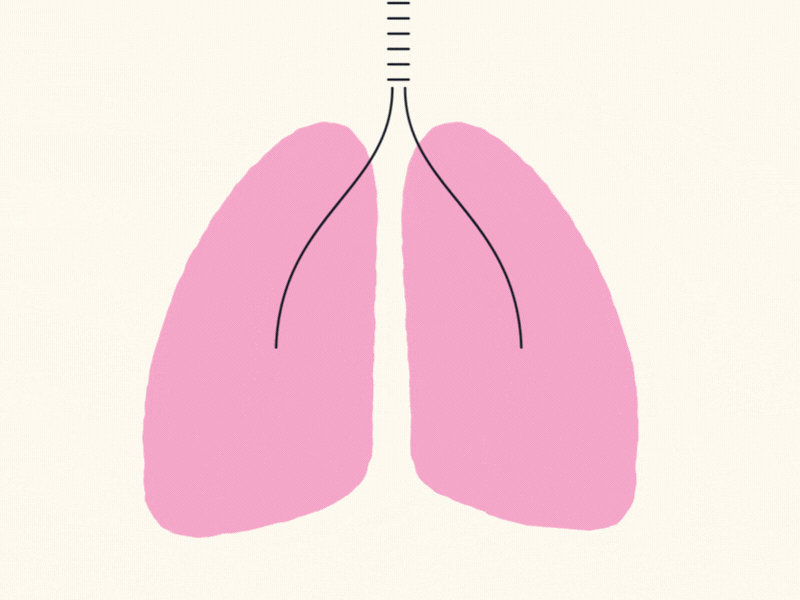

In [ ]:
data = pd.read_csv("survey lung cancer.csv")

FileNotFoundError: ignored

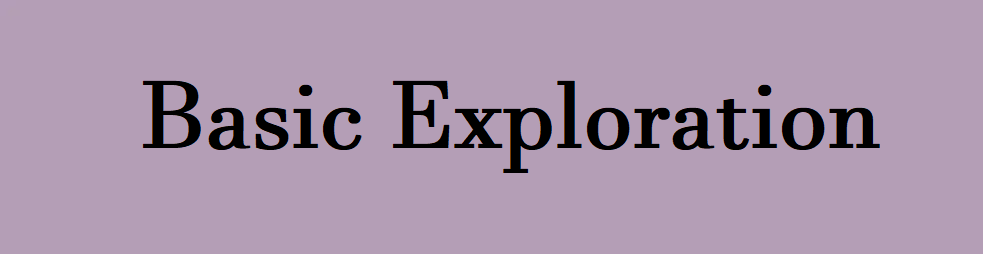

In [ ]:
print(f"Shape of The Dataset : {data.shape}")
print(f"\nGlimpse of The Dataset :")
data.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Shape of The Dataset : (309, 16)

Glimpse of The Dataset :


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
print(f"Informations About The Dataset :\n")
print(data.info())

Informations About The Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    i

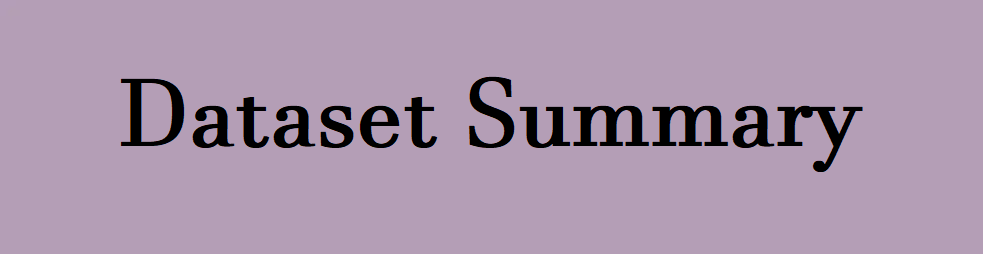

In [ ]:
print(f"Summary of This Dataset :")
data.describe().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Summary of This Dataset :


NameError: ignored

In [ ]:
data.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


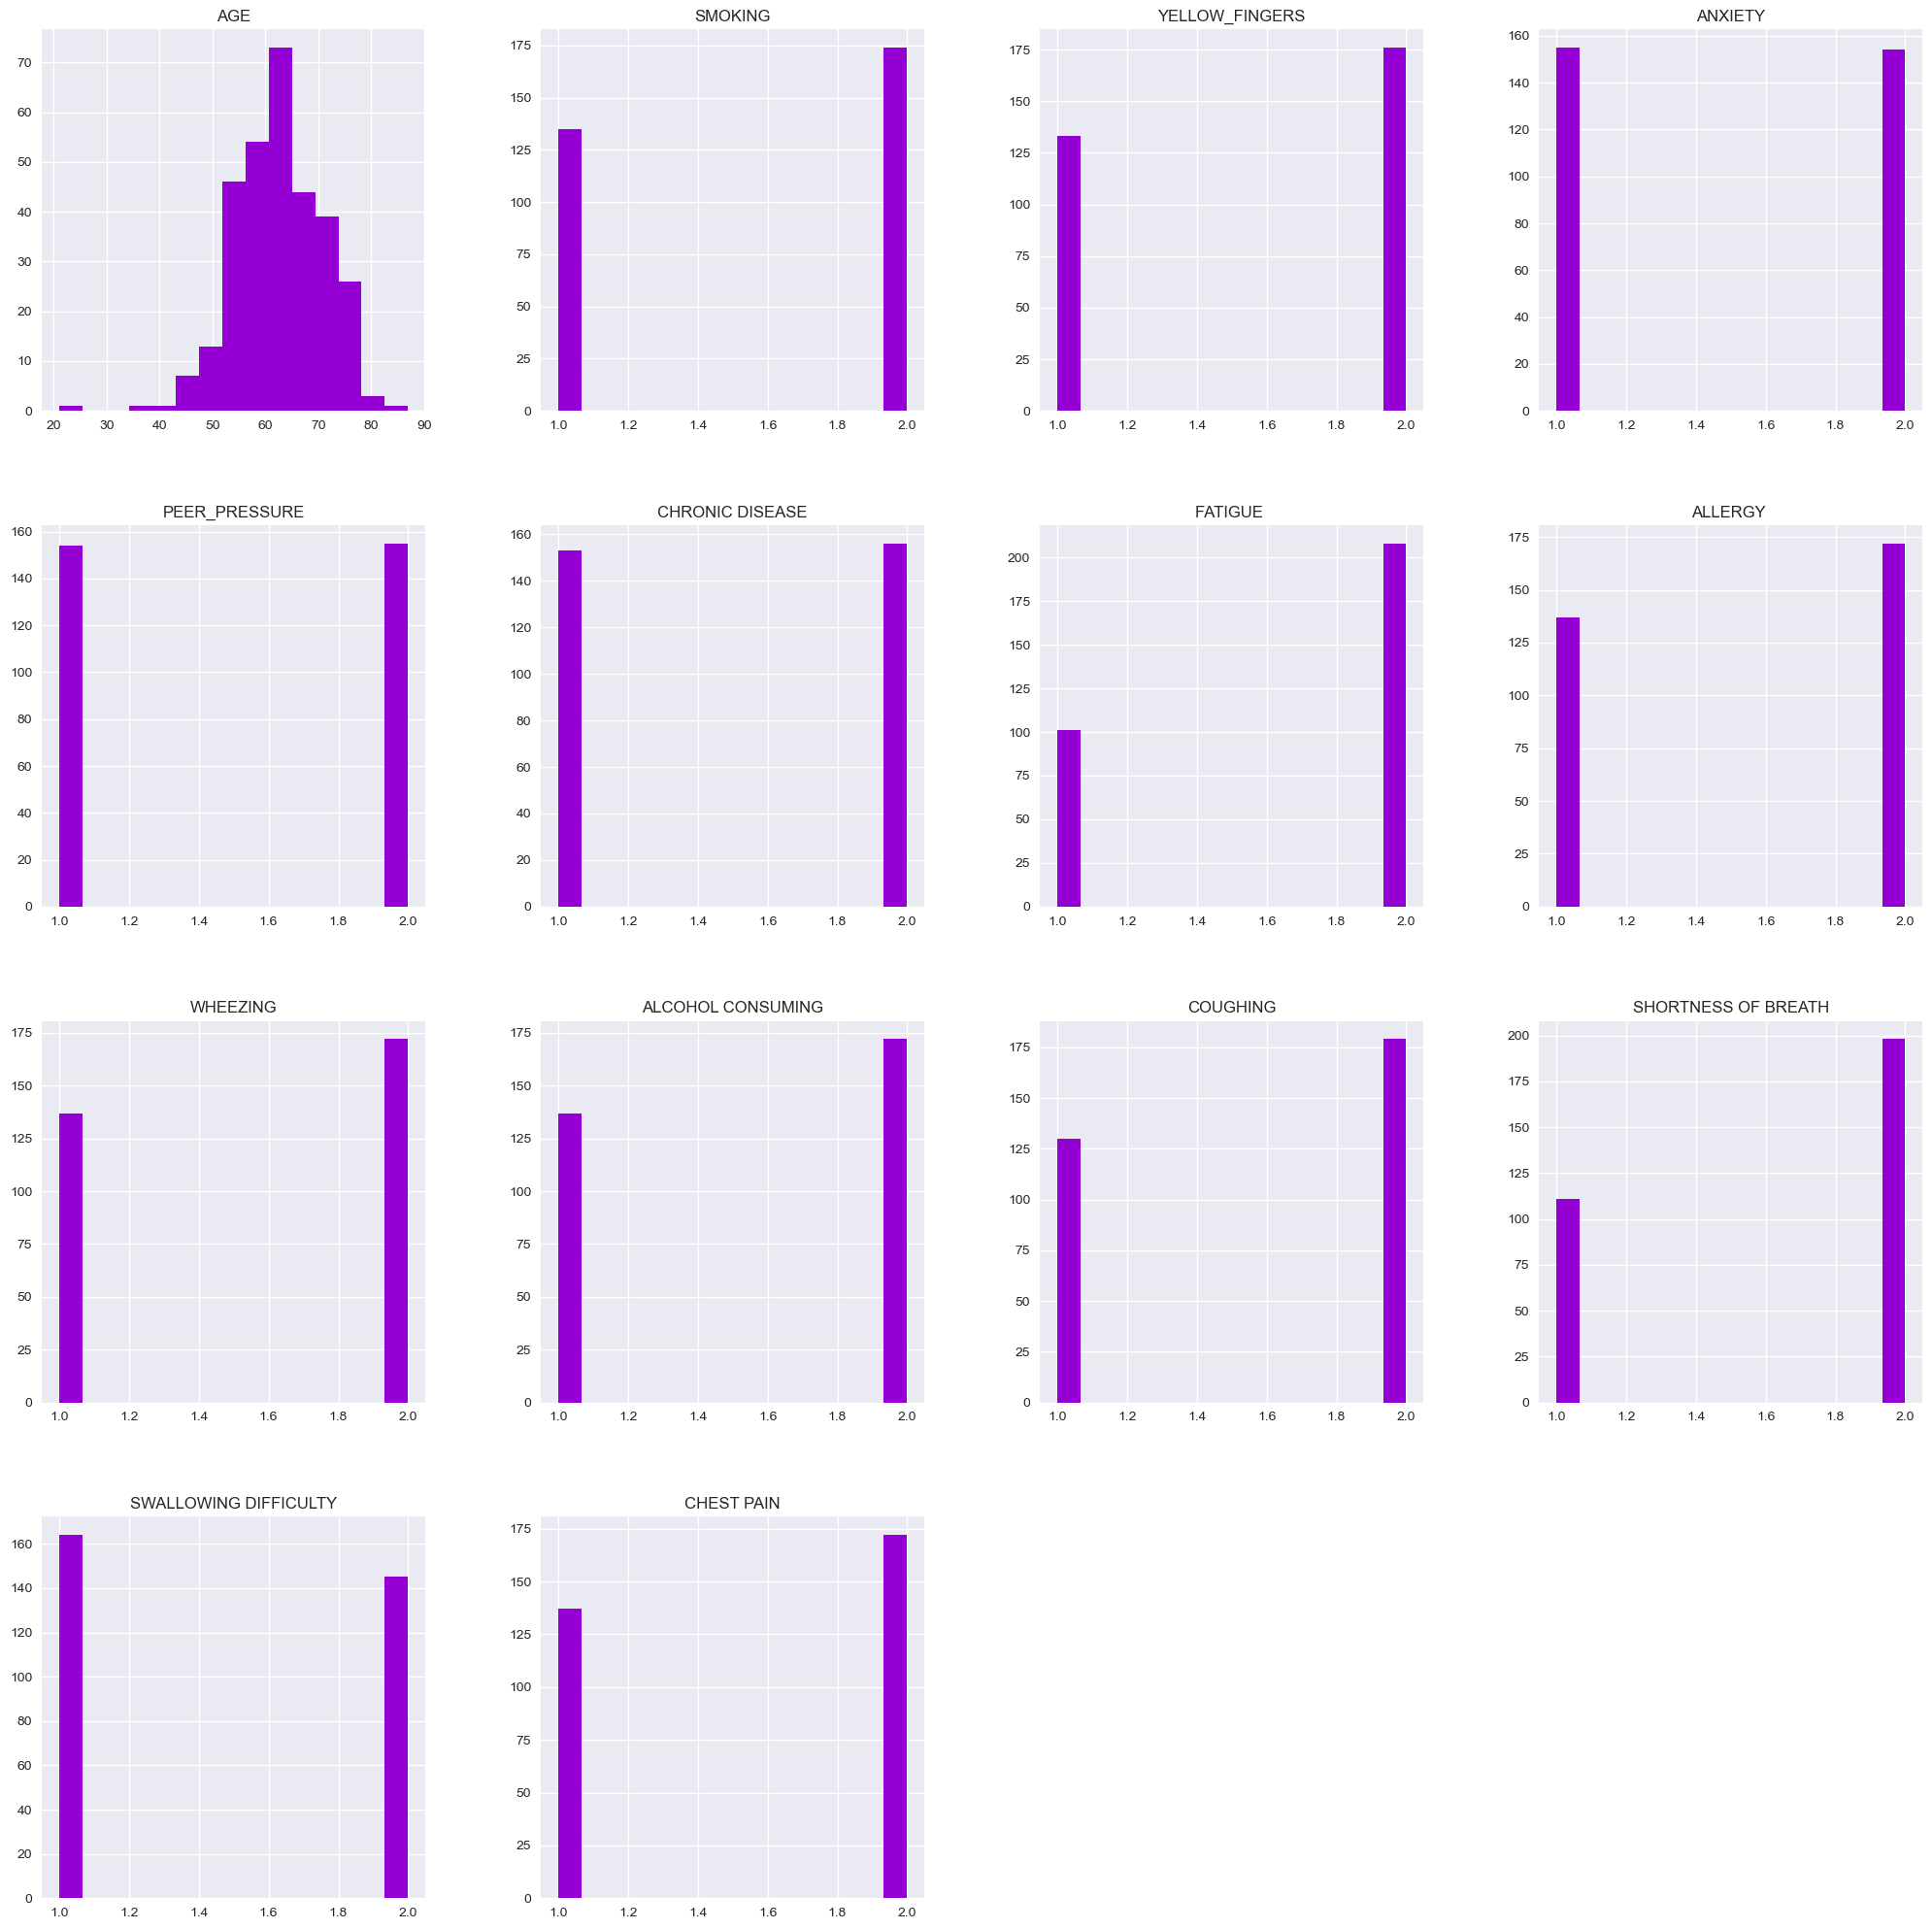

In [ ]:
plt.style.use("seaborn")
data.hist(figsize=(25,25),color="#9400d3" ,bins=15);

# Digging Deeper

In [ ]:
data_temp = data.copy()
data_temp["GENDER"] = data_temp["GENDER"].replace({"M" : "Male" , "F" : "Female"})

for column in data_temp.columns:
    data_temp[column] = data_temp[column].replace({2: "Yes" , 1 : "No"})

data_temp.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Male,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,YES
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,YES
2,Female,59,No,No,No,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,NO
3,Male,63,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,Yes,Yes,NO
4,Female,63,No,Yes,No,No,No,No,No,Yes,No,Yes,Yes,No,No,NO


In [ ]:
sns.set_style("whitegrid")
sns.set_context("poster",font_scale = .4)

palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]

# sns.palplot(sns.color_palette(palette))
# plt.show()

In [ ]:
data['LUNG_CANCER'].value_counts()
# function for plotting
def plot(col, data=data):
    return data.groupby(col)['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))

<AxesSubplot:xlabel='AGE'>

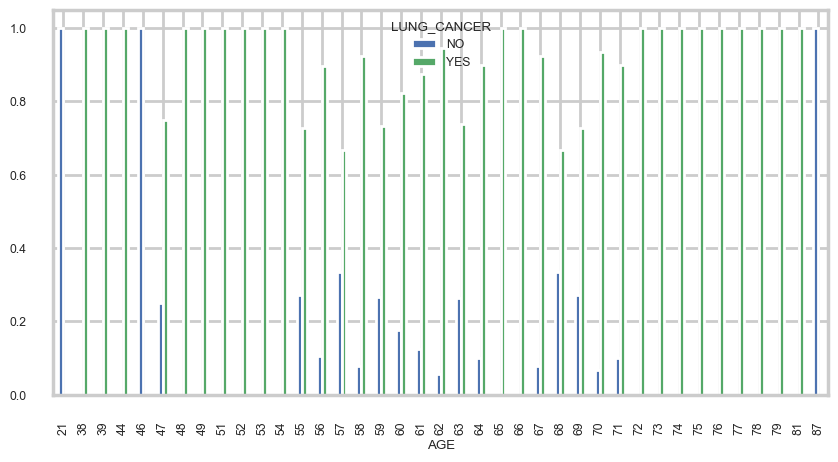

In [ ]:
plot('AGE')

# Positive Lung Cancer Cases

In [ ]:
data_temp_pos = data_temp[data_temp["LUNG_CANCER"] == "YES"]
data_temp_pos.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Male,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,YES
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,YES
5,Female,75,No,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,YES
6,Male,52,Yes,No,No,No,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,YES
7,Female,51,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Yes,Yes,No,YES


# Positive Cases' Age Distribution

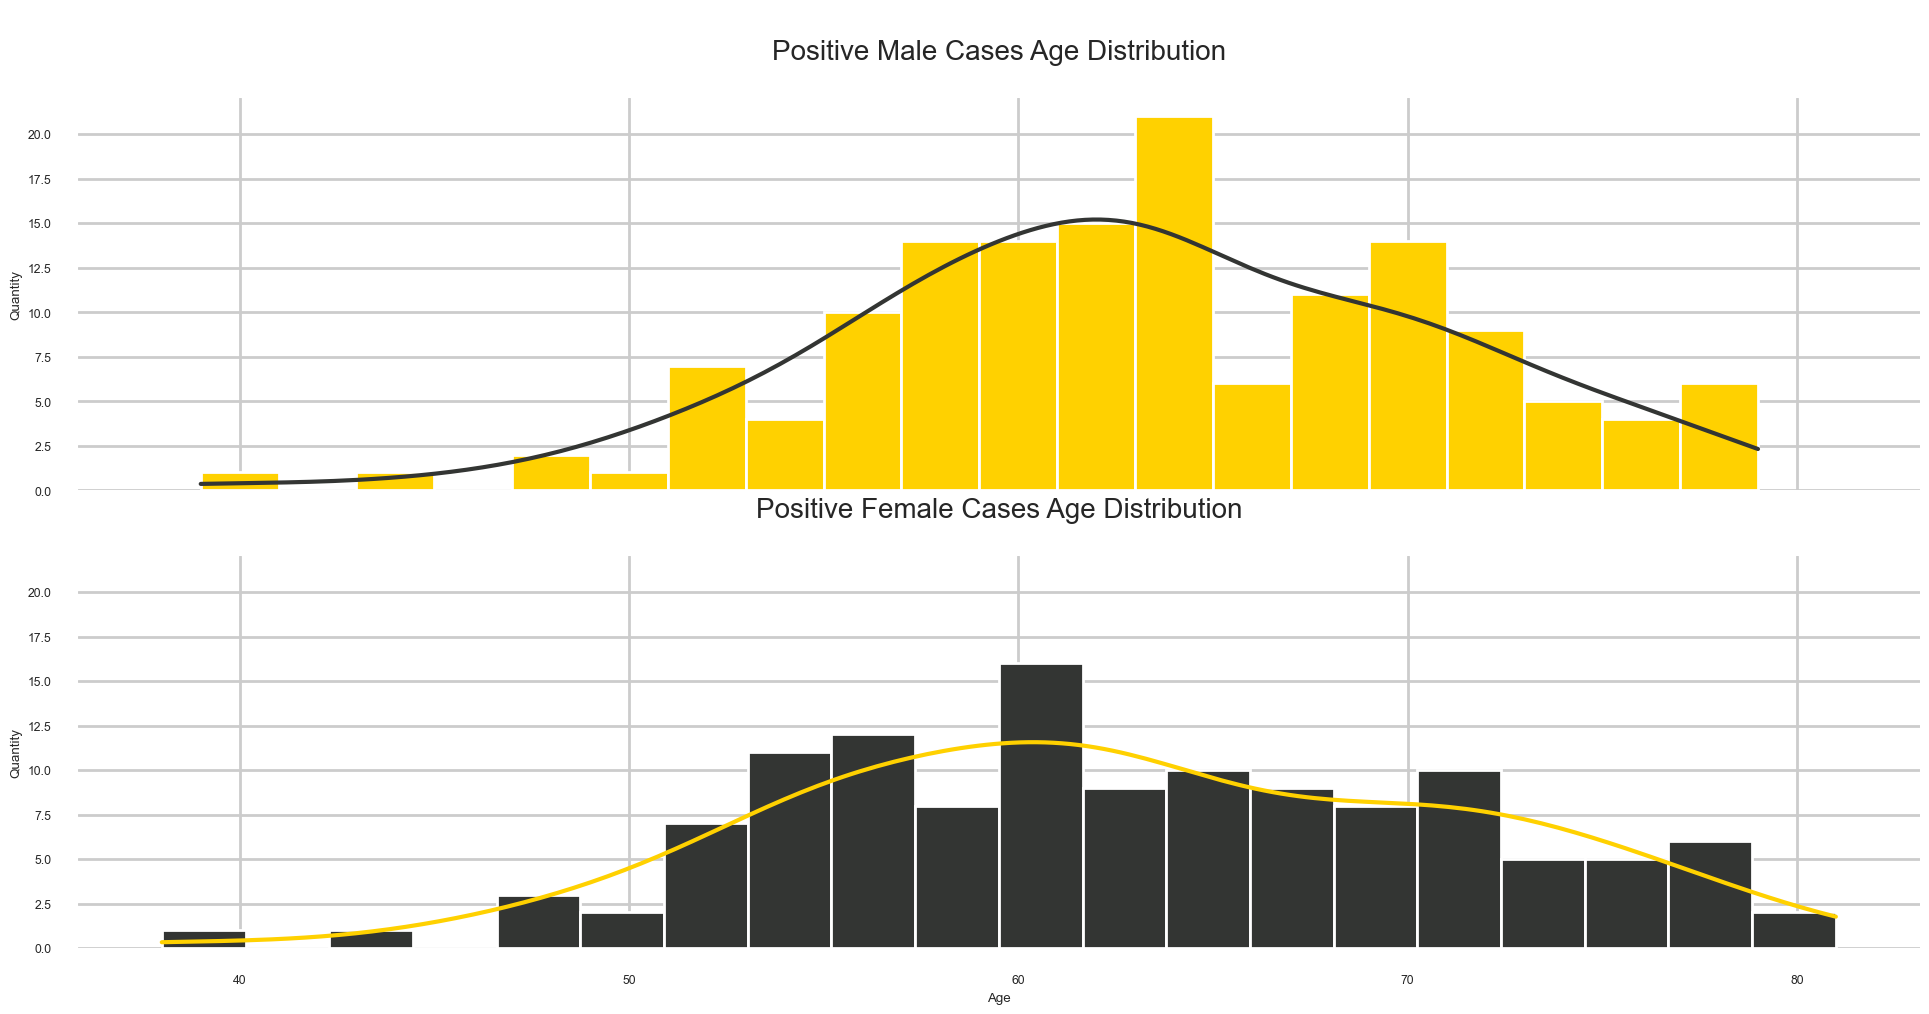

In [ ]:
_, axs = plt.subplots(2,1,figsize=(20,10),sharex=True,sharey=True)
plt.tight_layout(pad=4.0)

sns.histplot(data_temp_pos[data_temp_pos["GENDER"]=="Male"]["AGE"],color=palette[11],kde=True,ax=axs[0],bins=20,alpha=1,fill=True)
axs[0].lines[0].set_color(palette[12])
axs[0].set_title("\nPositive Male Cases Age Distribution\n",fontsize=20)
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Quantity")

sns.histplot(data_temp_pos[data_temp_pos["GENDER"]=="Female"]["AGE"],color=palette[12],kde=True,ax=axs[1],bins=20,alpha=1,fill=True)
axs[1].lines[0].set_color(palette[11])
axs[1].set_title("\nPositive Female Cases Age Distribution\n",fontsize=20)
axs[1].set_xlabel("Age")
axs[1].set_ylabel("Quantity")

sns.despine(left=True, bottom=True)
plt.show()

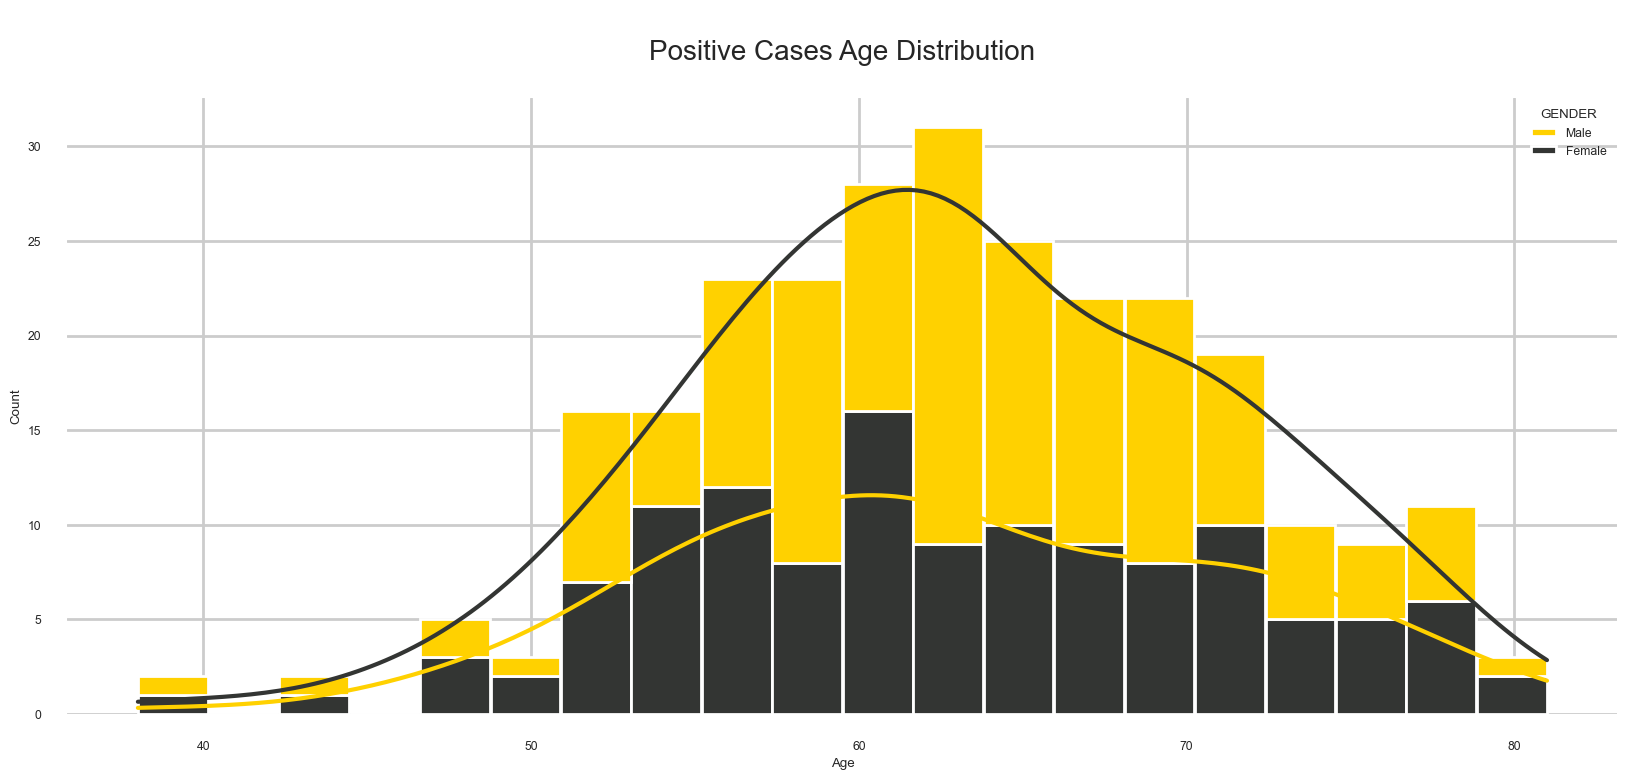

In [ ]:
plt.subplots(figsize=(20, 8))
p = sns.histplot(data=data_temp_pos,x="AGE",hue="GENDER",multiple="stack",palette=palette[11:13],kde=True,shrink=.99,bins=20,alpha=1,fill=True)
p.axes.lines[0].set_color(palette[11])
p.axes.lines[1].set_color(palette[12])
p.axes.set_title("\nPositive Cases Age Distribution\n",fontsize=20)
plt.ylabel("Count")
plt.xlabel("Age")

sns.despine(left=True, bottom=True)
plt.show()

# Positive Cases' Gender Distribution

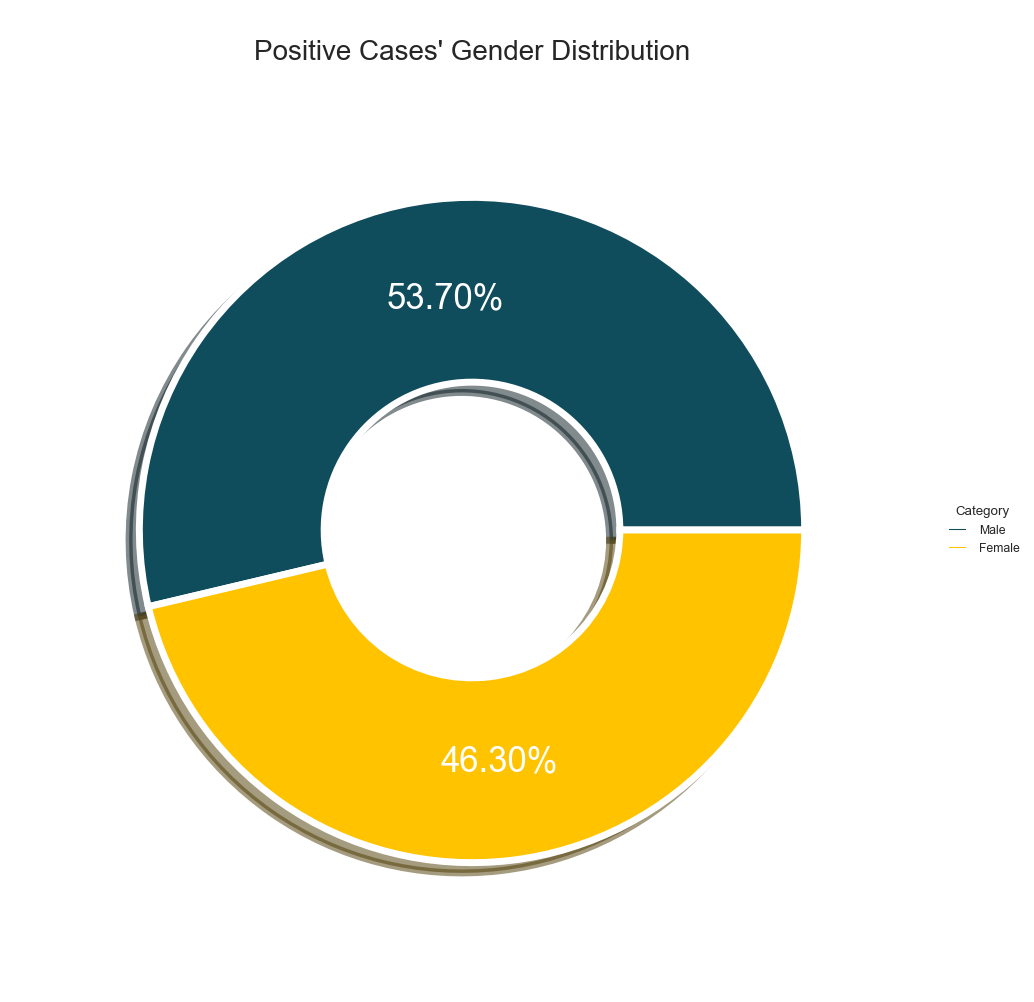

In [ ]:
plt.subplots(figsize=(12, 12))

labels = "Male","Female"
size = 0.5

wedges, texts, autotexts = plt.pie([len(data_temp_pos[data_temp_pos["GENDER"]=="Male"]["GENDER"]),
                                    len(data_temp_pos[data_temp_pos["GENDER"]=="Female"]["GENDER"])],
                                    explode = (0,0),
                                    textprops=dict(size= 25, color= "white"),
                                    autopct="%.2f%%",
                                    pctdistance = 0.7,
                                    radius=.9,
                                    colors = ["#0f4c5c","#FFC300"],
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "white",
                                    linewidth = 5),
                                    startangle = 0)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nPositive Cases' Gender Distribution",fontsize=20)
plt.show()

# Gender-wise Positive Cases' Reasons

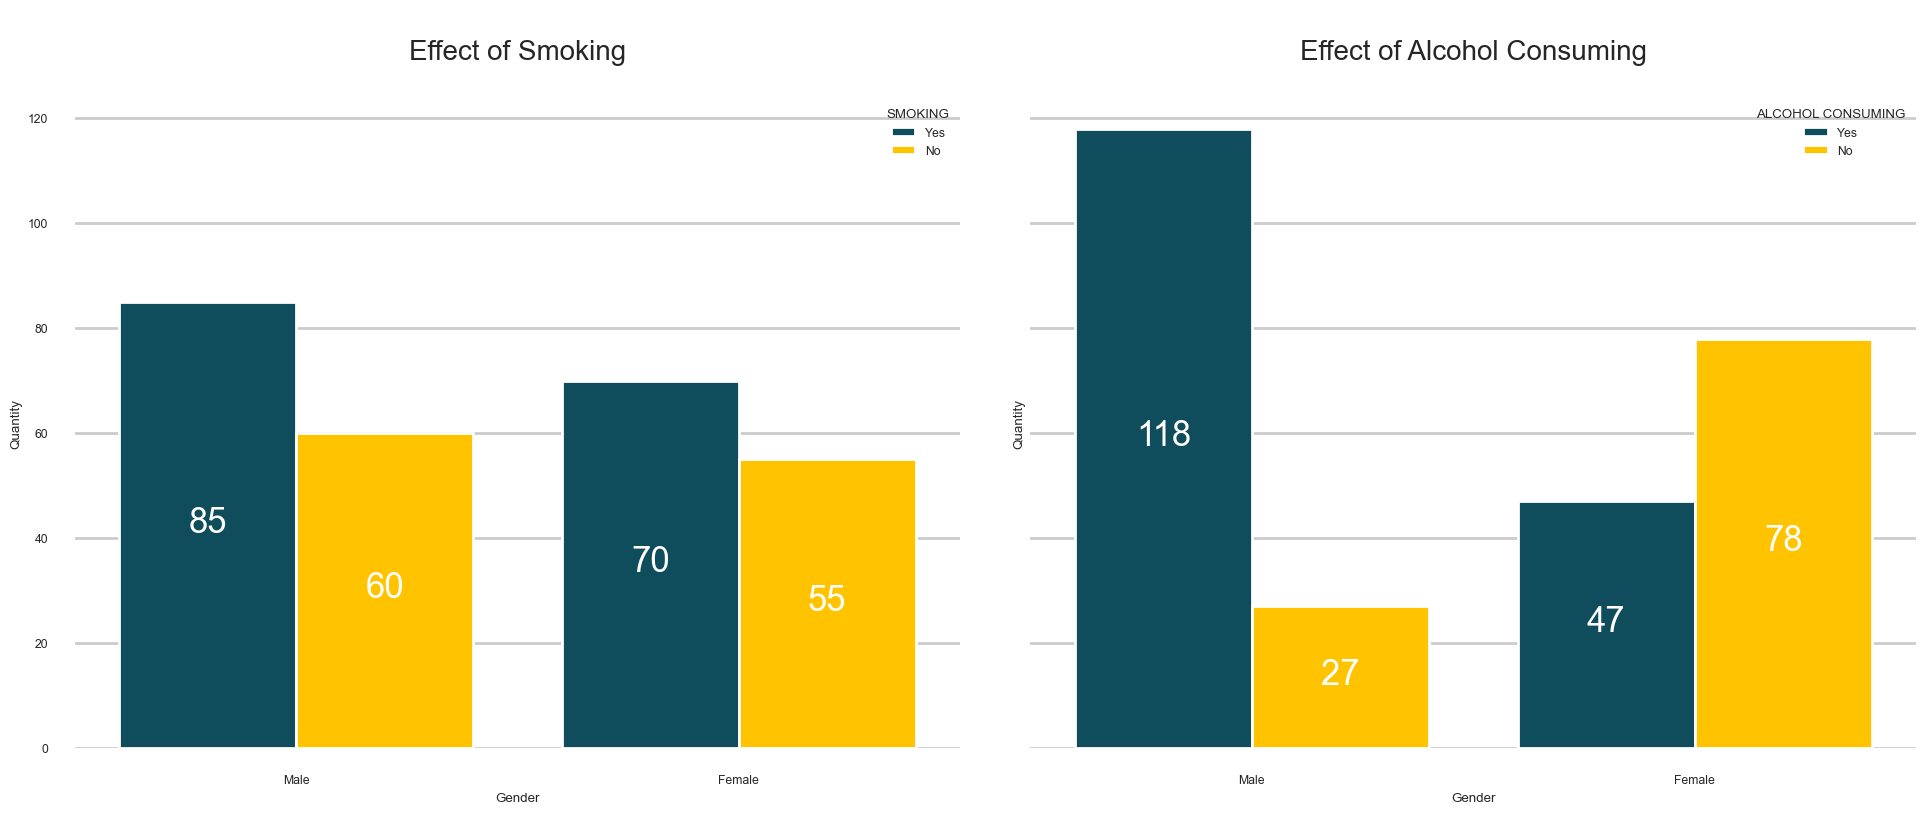

In [ ]:
_, axs = plt.subplots(1,2,figsize=(20,8),sharex=True,sharey=True)
plt.tight_layout(pad=4.0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="SMOKING",hue_order=["Yes","No"],ax=axs[0],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0].set_title("\nEffect of Smoking\n",fontsize=20)
axs[0].set_xlabel("Gender")
axs[0].set_ylabel("Quantity")
for container in axs[0].containers:
    axs[0].bar_label(container,label_type="center",padding=2,size=25,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="ALCOHOL CONSUMING",hue_order=["Yes","No"],ax=axs[1],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1].set_title("\nEffect of Alcohol Consuming\n",fontsize=20)
axs[1].set_xlabel("Gender")
axs[1].set_ylabel("Quantity")
for container in axs[1].containers:
    axs[1].bar_label(container,label_type="center",padding=2,size=25,color="white",rotation=0)

sns.despine(left=True, bottom=True)
plt.show()

# Gender-wise Positive Cases' Symptoms

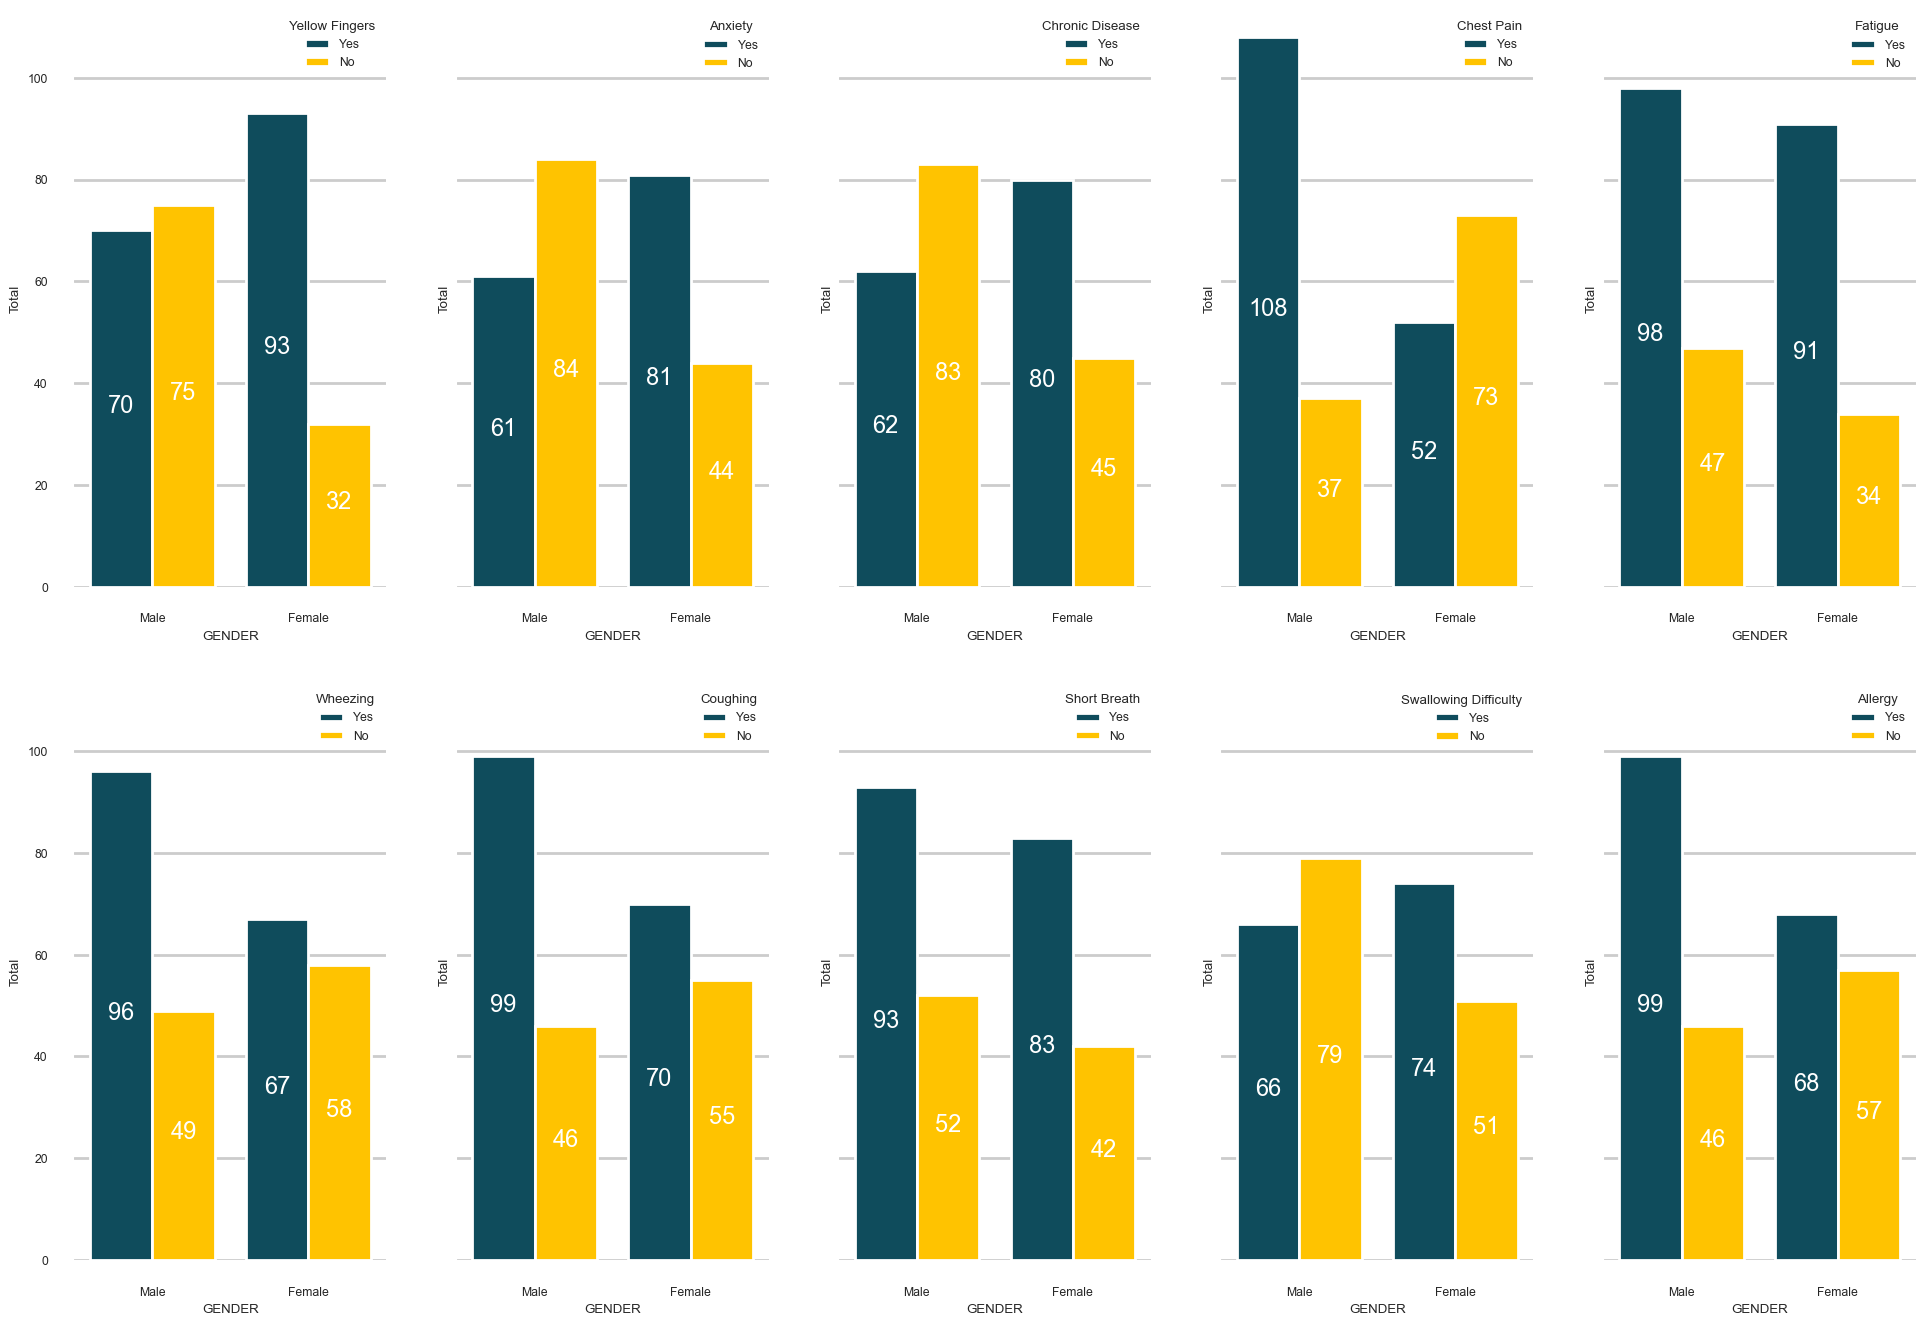

In [ ]:
_, axs = plt.subplots(2,5,figsize=(20,14),sharex=False,sharey=True)
plt.tight_layout(pad=4.0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="YELLOW_FINGERS",hue_order=["Yes","No"],ax=axs[0,0],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0,0].set_ylabel("Total")
axs[0,0].legend(title="Yellow Fingers",loc="upper right")
for container in axs[0,0].containers:
    axs[0,0].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="ANXIETY",hue_order=["Yes","No"],ax=axs[0,1],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0,1].set_ylabel("Total")
axs[0,1].legend(title="Anxiety",loc="upper right")
for container in axs[0,1].containers:
    axs[0,1].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="CHRONIC DISEASE",hue_order=["Yes","No"],ax=axs[0,2],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0,2].set_ylabel("Total")
axs[0,2].legend(title="Chronic Disease",loc="upper right")
for container in axs[0,2].containers:
    axs[0,2].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="CHEST PAIN",hue_order=["Yes","No"],ax=axs[0,3],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0,3].set_ylabel("Total")
axs[0,3].legend(title="Chest Pain",loc="upper right")
for container in axs[0,3].containers:
    axs[0,3].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="FATIGUE ",hue_order=["Yes","No"],ax=axs[0,4],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0,4].set_ylabel("Total")
axs[0,4].legend(title="Fatigue",loc="upper right")
for container in axs[0,4].containers:
    axs[0,4].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="WHEEZING",hue_order=["Yes","No"],ax=axs[1,0],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1,0].set_ylabel("Total")
axs[1,0].legend(title="Wheezing",loc="upper right")
for container in axs[1,0].containers:
    axs[1,0].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="COUGHING",hue_order=["Yes","No"],ax=axs[1,1],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1,1].set_ylabel("Total")
axs[1,1].legend(title="Coughing",loc="upper right")
for container in axs[1,1].containers:
    axs[1,1].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="SHORTNESS OF BREATH",hue_order=["Yes","No"],ax=axs[1,2],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1,2].set_ylabel("Total")
axs[1,2].legend(title="Short Breath",loc="upper right")
for container in axs[1,2].containers:
    axs[1,2].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="SWALLOWING DIFFICULTY",hue_order=["Yes","No"],ax=axs[1,3],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1,3].set_ylabel("Total")
axs[1,3].legend(title="Swallowing Difficulty",loc="upper right")
for container in axs[1,3].containers:
    axs[1,3].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="ALLERGY ",hue_order=["Yes","No"],ax=axs[1,4],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1,4].set_ylabel("Total")
axs[1,4].legend(title="Allergy",loc="upper right")
for container in axs[1,4].containers:
    axs[1,4].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.despine(left=True, bottom=True)
plt.show()

# Correlation Heatmap

In [ ]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()

data["GENDER"] = data["GENDER"].replace({"M" : "Male" , "F" : "Female"})
data["LUNG_CANCER"] = LabelEncoder.fit_transform(data["LUNG_CANCER"])

data = pd.get_dummies(data, columns= ["GENDER"])
data.rename(columns={"GENDER_Male" : "MALE", "GENDER_Female" : "FEMALE", "YELLOW_FINGERS" : "YELLOW FINGERS", "PEER_PRESSURE" : "PEER PRESSURE", "LUNG_CANCER" : "LUNG CANCER", "FATIGUE " : "FATIGUE", "ALLERGY " : "ALLERGY"}, inplace=True)
data = data[["AGE","MALE","FEMALE","ALCOHOL CONSUMING","CHEST PAIN","SHORTNESS OF BREATH","COUGHING","PEER PRESSURE","CHRONIC DISEASE","SWALLOWING DIFFICULTY","YELLOW FINGERS","ANXIETY","FATIGUE","ALLERGY","WHEEZING","LUNG CANCER"]]
data.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,AGE,MALE,FEMALE,ALCOHOL CONSUMING,CHEST PAIN,SHORTNESS OF BREATH,COUGHING,PEER PRESSURE,CHRONIC DISEASE,SWALLOWING DIFFICULTY,YELLOW FINGERS,ANXIETY,FATIGUE,ALLERGY,WHEEZING,LUNG CANCER
0,69,1,0,2,2,2,2,1,1,2,2,2,2,1,2,1
1,74,1,0,1,2,2,1,1,2,2,1,1,2,2,1,1
2,59,0,1,1,2,2,2,2,1,1,1,1,2,1,2,0
3,63,1,0,2,2,1,1,1,1,2,2,2,1,1,1,0
4,63,0,1,1,1,2,2,1,1,1,2,1,1,1,2,0


<AxesSubplot:>

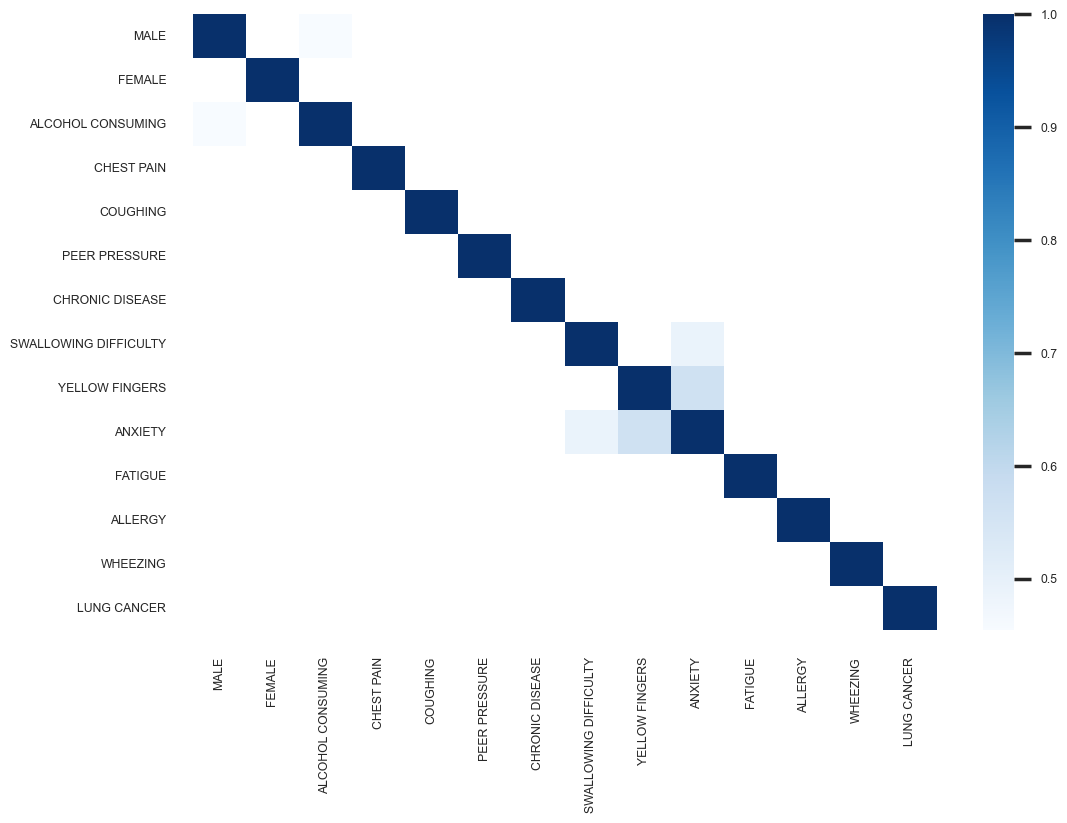

In [ ]:
kot = cn[cn>=.40]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Blues")

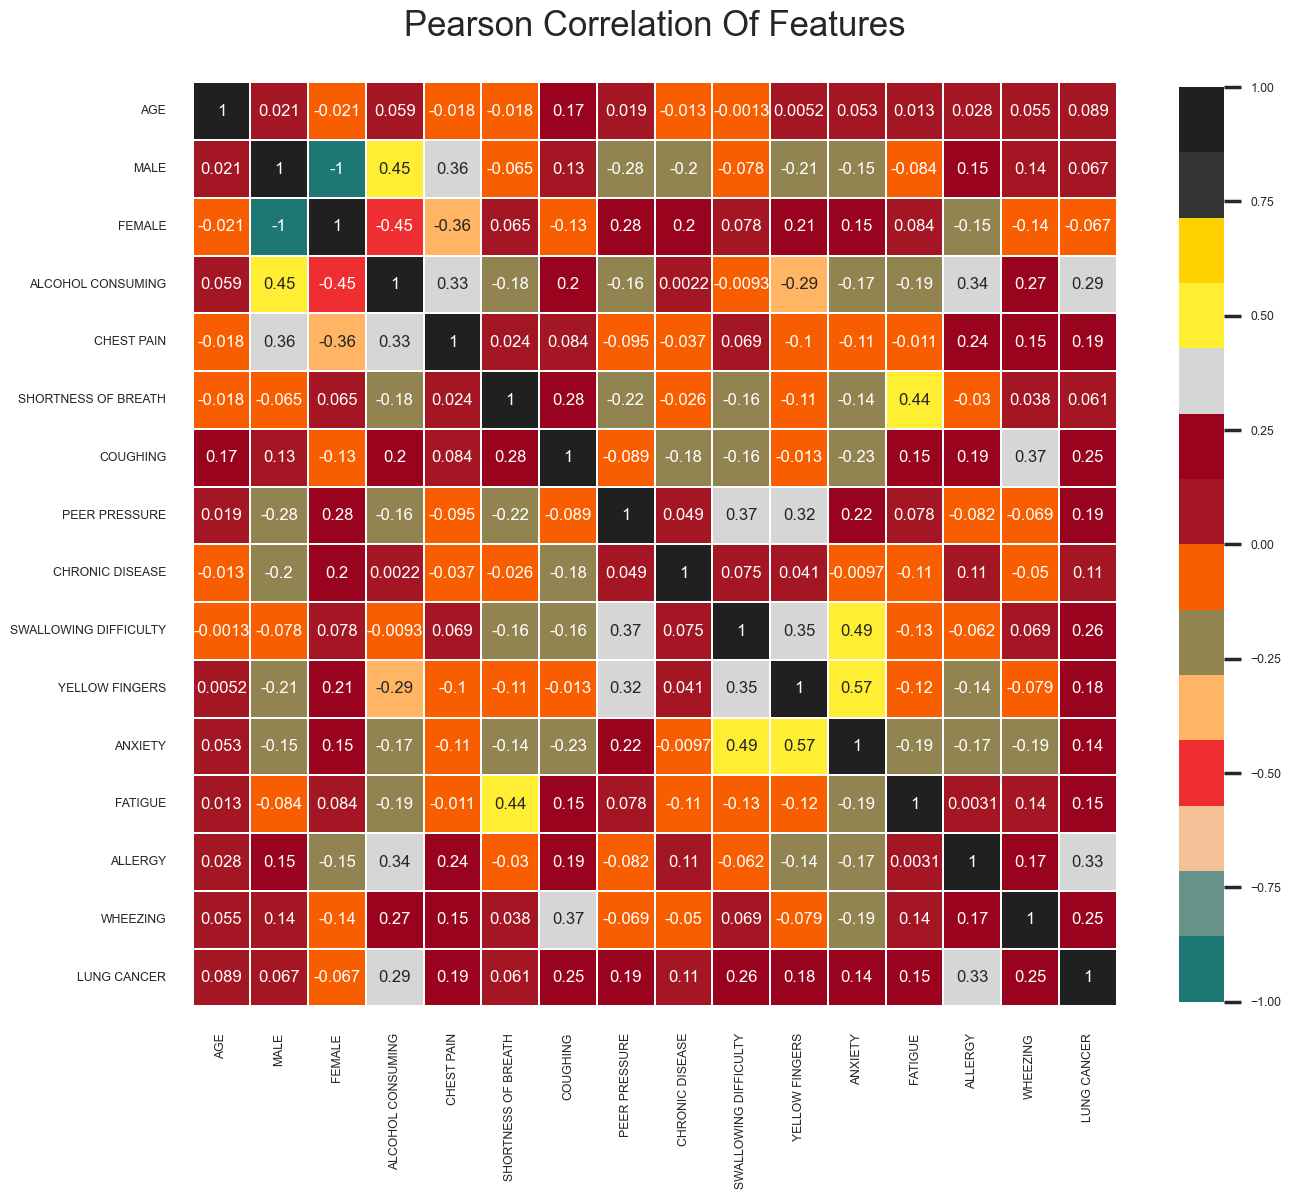

In [ ]:
plt.subplots(figsize =(16, 12))

p=sns.heatmap(data.corr(), cmap = palette, square=True, cbar_kws=dict(shrink =.99),
            annot=True, vmin=-1, vmax=1, linewidths=0.1,linecolor='white',annot_kws=dict(fontsize =12))
p.axes.set_title("Pearson Correlation Of Features\n", fontsize=25)
plt.xticks(rotation=90)
plt.show()

# Lung Cancer Across Genders

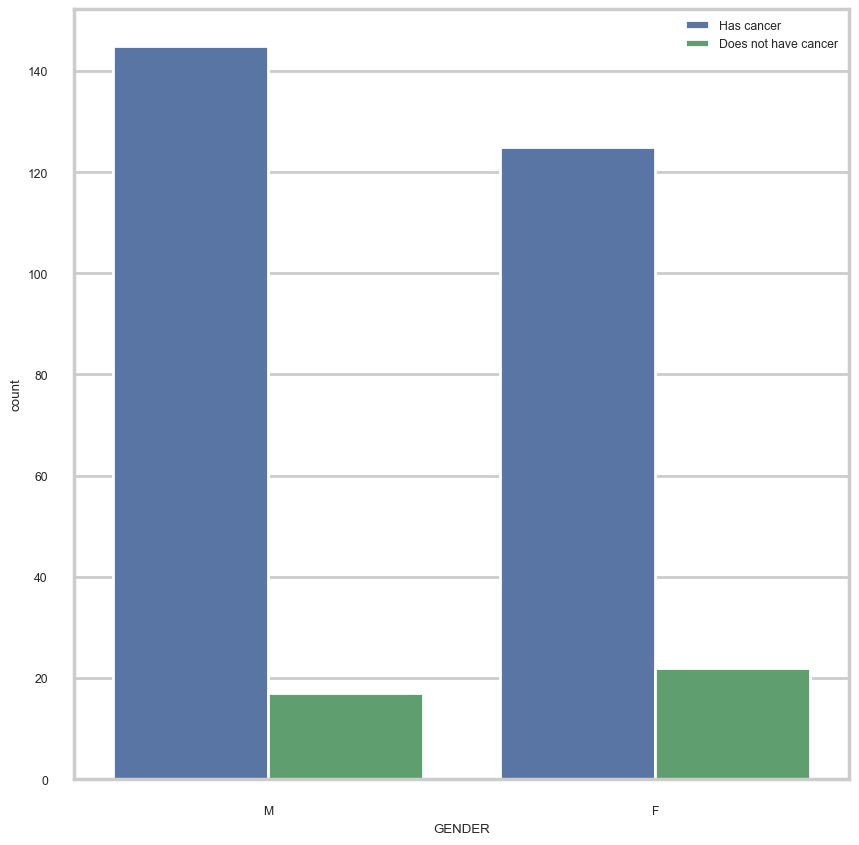

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(data=cancer_data,x='GENDER',hue='LUNG_CANCER')
plt.legend(["Has cancer", 'Does not have cancer'])

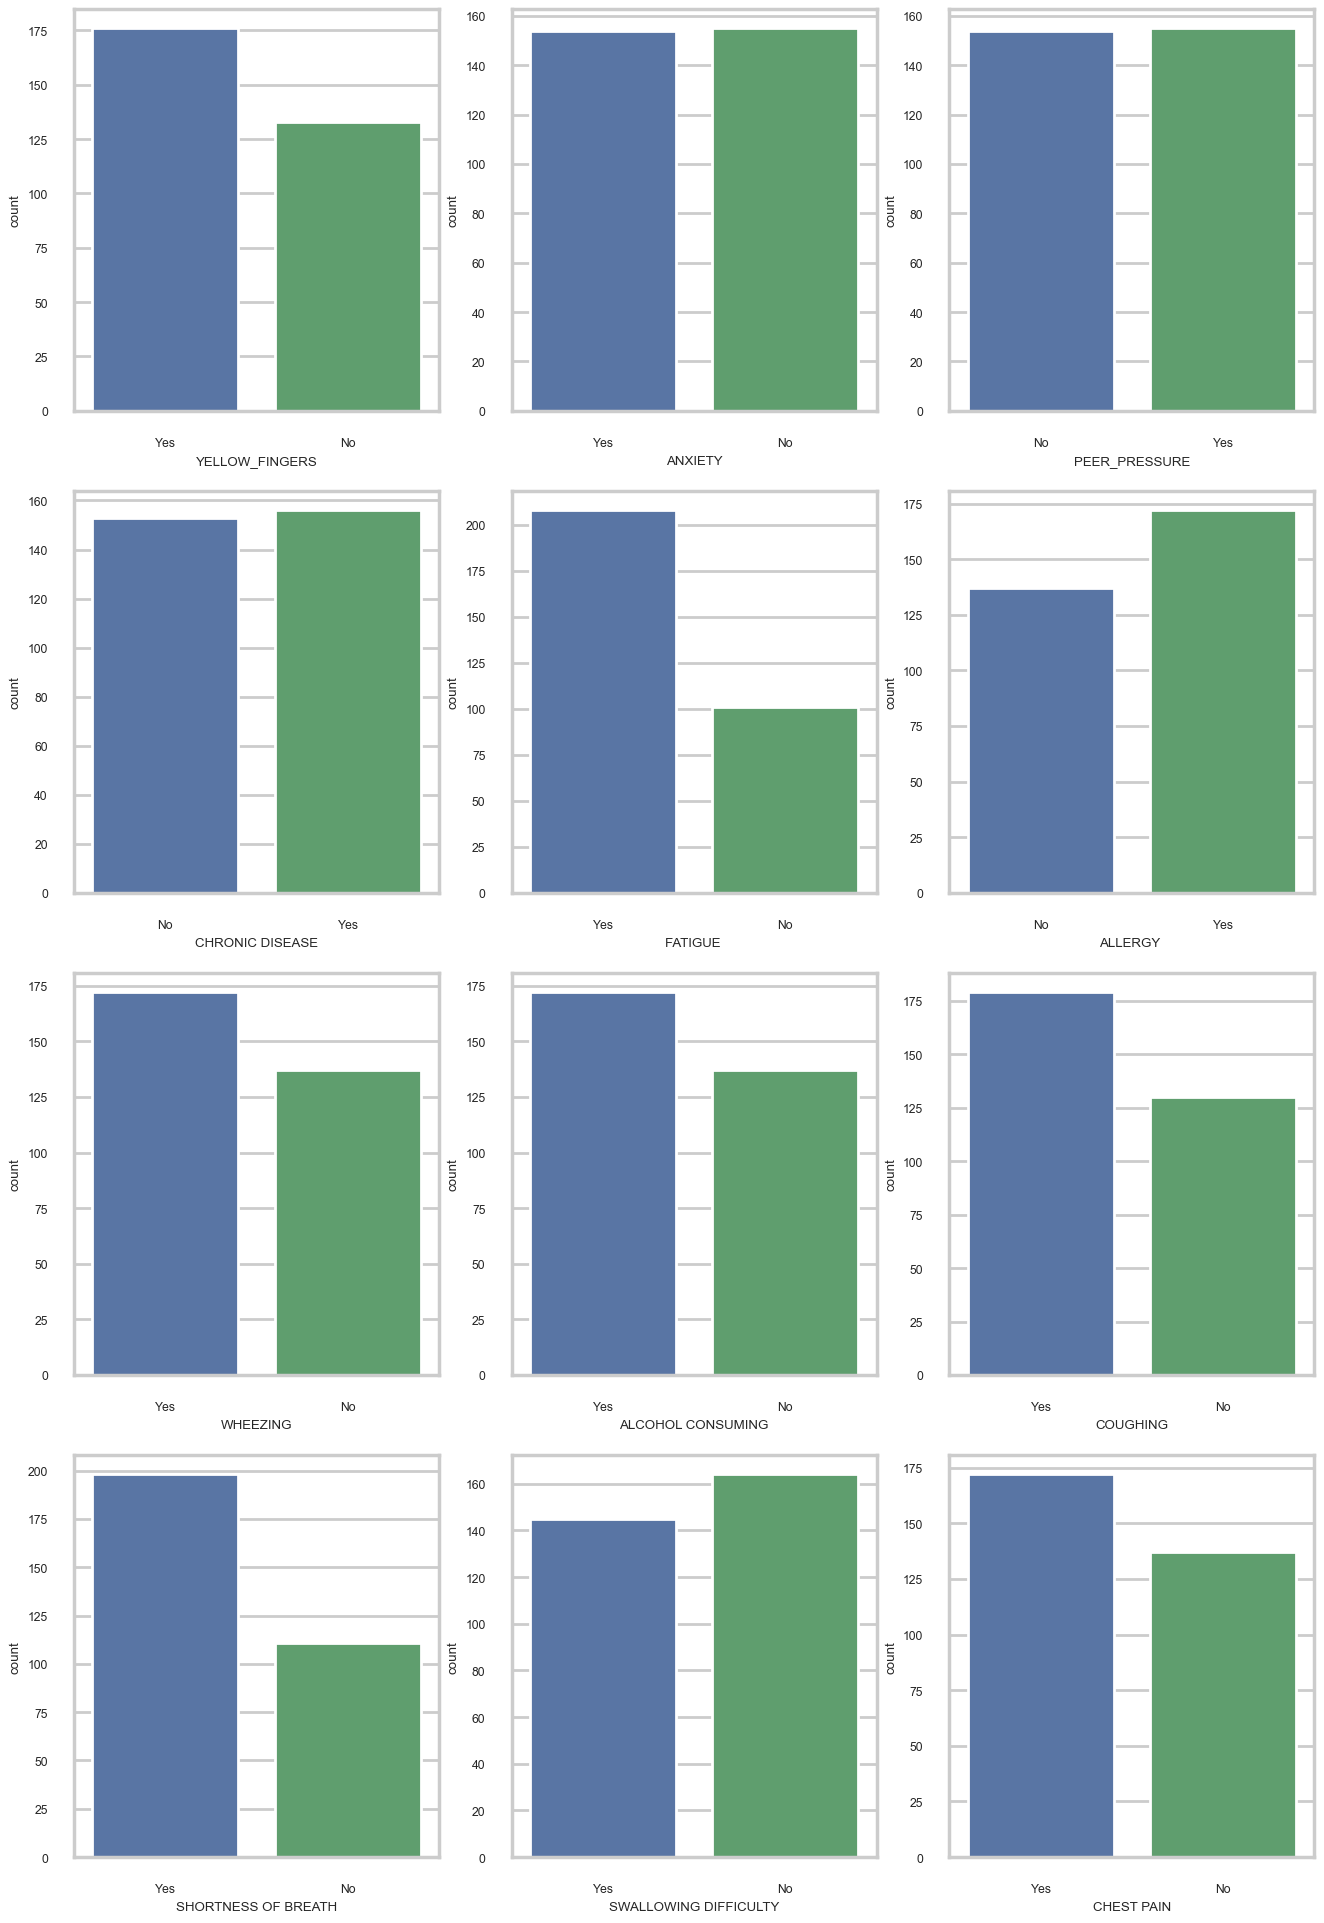

In [ ]:
data_cancer = pd.read_csv("survey lung cancer.csv")

X = ['YELLOW_FINGERS', 'ANXIETY','PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING','ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',  'SWALLOWING DIFFICULTY', 'CHEST PAIN']
fig, ax = plt.subplots(nrows = 4, ncols = 3) # 16 subplots
fig.set_size_inches(16,24) # set figure size

for i in range(4):
    for j in range(3):
        sns.countplot(x = cancer_data[X[3 * i + j]] , ax = ax[i][j]) # count plot

# Let's analyze the likeliness of having the symptoms a little more.

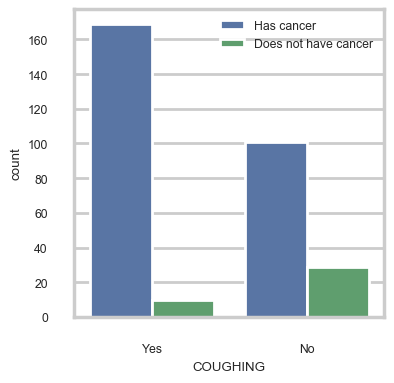

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(data=cancer_data,x='COUGHING',hue='LUNG_CANCER')
plt.legend(["Has cancer", 'Does not have cancer'])

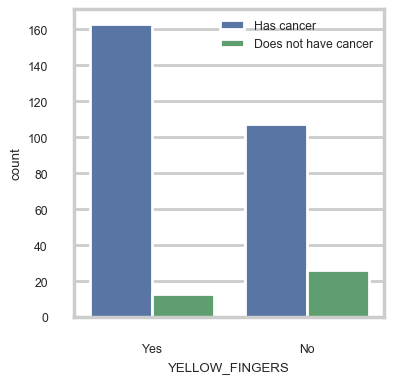

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(data=cancer_data,x='YELLOW_FINGERS',hue='LUNG_CANCER')
plt.legend(["Has cancer", 'Does not have cancer'])

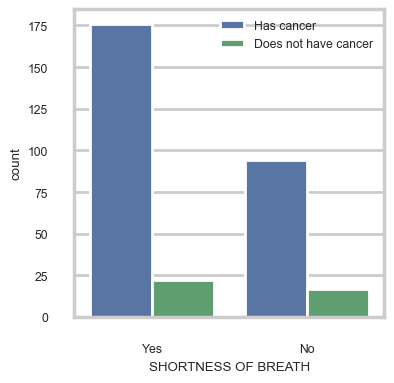

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(data=cancer_data,x='SHORTNESS OF BREATH',hue='LUNG_CANCER')
plt.legend(["Has cancer", 'Does not have cancer'])

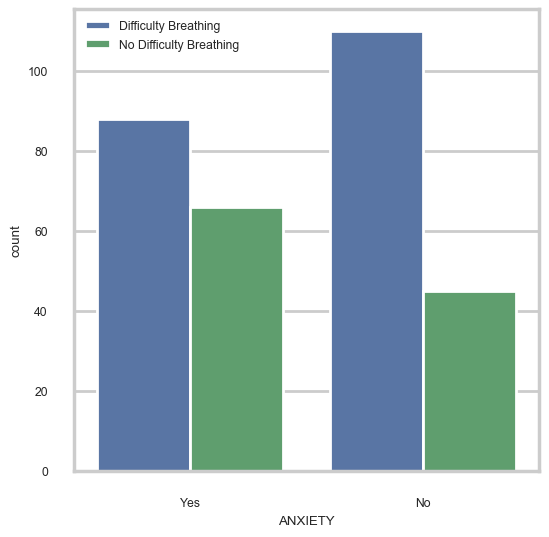

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(data=cancer_data,x='ANXIETY',hue='SHORTNESS OF BREATH')
plt.legend(["Difficulty Breathing", 'No Difficulty Breathing'])

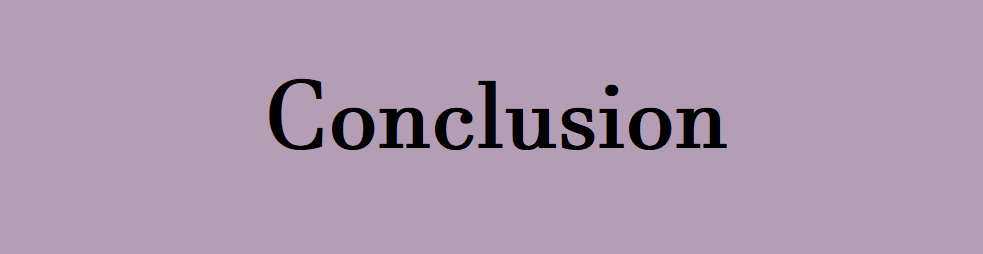